In [8]:
import pandas as pd
import numpy as np
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

In [2]:
# import clean dataframe with customer information
df_clean = pd.read_csv('/Users/ilaydabekircan/Documents/Vision Bridge/DS Assignment/df_clean.csv')
df_clean.head(3)

,CustomerID,RetailerID,CustomerCity,CustomerState,Gender,Age,EmploymentStatus,Education,Occupation,Industry,...,Insight,CriteriaType,CampaignName,Budget,CampaignMonth,CampaignWeekOfMonth,Metric,Value,ChannelName,type
0,4,24,New York city,New York,female,75 years and over,employed,graduate_or_professional_degree,management_business_science_arts,other_services,...,engagement status,dwell_time_seconds,Campaign Q,6548.08,7,4,Conversions,8892,Channel O2,podcast
1,4,24,New York city,New York,female,75 years and over,employed,graduate_or_professional_degree,management_business_science_arts,other_services,...,engagement status,dwell_time_seconds,Campaign Q,6548.08,7,4,Clicks,3438,Channel O2,podcast
2,4,24,New York city,New York,female,75 years and over,employed,graduate_or_professional_degree,management_business_science_arts,other_services,...,engagement status,dwell_time_seconds,Campaign Q,6548.08,7,4,Clicks,172,Channel O2,podcast


In [3]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83369 entries, 0 to 83368
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           83369 non-null  int64  
 1   RetailerID           83369 non-null  int64  
 2   CustomerCity         83369 non-null  object 
 3   CustomerState        83369 non-null  object 
 4   Gender               83369 non-null  object 
 5   Age                  83369 non-null  object 
 6   EmploymentStatus     83369 non-null  object 
 7   Education            83369 non-null  object 
 8   Occupation           83369 non-null  object 
 9   Industry             83369 non-null  object 
 10  Income               83369 non-null  int64  
 11  Count                83369 non-null  int64  
 12  TotalAmount          83369 non-null  float64
 13  Status               83369 non-null  object 
 14  OrderMonth           83369 non-null  int64  
 15  OrderDay             83369 non-null 

In [4]:
# define an array with categorical columns' indexes
cat_cols = ['CustomerCity', 'CustomerState', 'Gender', 'Age', 'EmploymentStatus', 'Education', 'Occupation', 'Industry',
'Status', 'ProductName', 'MainCategory', 'SubCategory', 'StoreName', 'StoreCity', 'StoreState', 'Insight', 
'CriteriaType', 'CampaignName', 'Metric', 'ChannelName', 'type']

cat_col_indices = [df_clean.columns.get_loc(col) for col in cat_cols]
cat_col_indices

[2, 3, 4, 5, 6, 7, 8, 9, 13, 21, 22, 23, 26, 27, 28, 29, 30, 31, 35, 37, 38]

In [6]:
# run KPrototypes from 2 to 9 clusters

costs = []
k = range(2,10)

for i in k:
    kp = KPrototypes(n_clusters = i, 
                     init = 'Cao', 
                     n_init = 5, 
                     verbose = 1)
    
    kp.fit(df_clean, 
           categorical = cat_col_indices)
    
    costs.append(kp.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3076, ncost: 3674565724399.12
Run: 1, iteration: 2/100, moves: 0, ncost: 3674565724399.12
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 37994, ncost: 5235123699133.735
Run: 2, iteration: 2/100, moves: 13061, ncost: 4722377328590.783
Run: 2, iteration: 3/100, moves: 12715, ncost: 3948823642944.514
Run: 2, iteration: 4/100, moves: 5124, ncost: 3674565724399.1636
Run: 2, iteration: 5/100, moves: 0, ncost: 3674565724399.1636
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 29538, ncost: 4501791771899.272
Run: 3, iteration: 2/100, moves: 10981, ncost: 3712801811232.1313
Run: 3, iteration: 3/100, moves: 1569, ncost: 3674565724399.1436
Run: 3, iteration: 4/100, moves: 0, ncost: 

Run: 1, iteration: 2/100, moves: 5652, ncost: 1341419748808.6785
Run: 1, iteration: 3/100, moves: 6114, ncost: 1278841500293.5225
Run: 1, iteration: 4/100, moves: 4438, ncost: 1190639101271.8967
Run: 1, iteration: 5/100, moves: 2849, ncost: 1152060283284.1746
Run: 1, iteration: 6/100, moves: 944, ncost: 1146789981080.2622
Run: 1, iteration: 7/100, moves: 56, ncost: 1146774329333.265
Run: 1, iteration: 8/100, moves: 0, ncost: 1146774329333.265
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 22233, ncost: 1159761805777.5874
Run: 2, iteration: 2/100, moves: 3176, ncost: 1147409073569.8608
Run: 2, iteration: 3/100, moves: 179, ncost: 1146999247203.4058
Run: 2, iteration: 4/100, moves: 21, ncost: 1146992234046.0586
Run: 2, iteration: 5/100, moves: 0, ncost: 1146992234046.0586
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteratio

Run: 5, iteration: 8/100, moves: 52, ncost: 1285581150580.4707
Run: 5, iteration: 9/100, moves: 0, ncost: 1285581150580.4707
Best run was number 1
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 15577, ncost: 1205053891267.7947
Run: 1, iteration: 2/100, moves: 6078, ncost: 1193327849670.5613
Run: 1, iteration: 3/100, moves: 1874, ncost: 1191687277921.8074
Run: 1, iteration: 4/100, moves: 600, ncost: 1191497268052.7961
Run: 1, iteration: 5/100, moves: 76, ncost: 1191494767492.0105
Run: 1, iteration: 6/100, moves: 0, ncost: 1191494767492.0105
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 19859, ncost: 869108960556.7268
Run: 2, iteration: 2/100, moves: 5611, ncost: 841889944539.8684
Run: 2, iteration: 3/100, moves: 2144, ncost: 

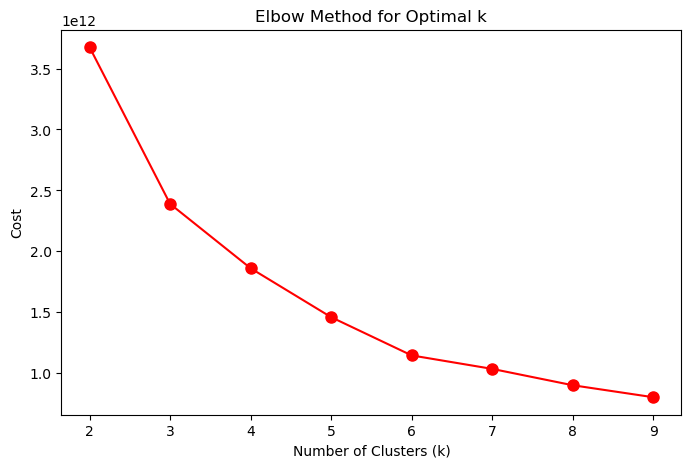

In [26]:
# plot the clusters for elbow method
plt.figure(figsize=(8, 5))
plt.plot(k, 
         costs, 
         'ro-', 
         markersize = 8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.show()

In [14]:
kp = KPrototypes(n_clusters = 3, 
                 init = 'Cao', 
                 n_init = 5, 
                 verbose = 1)

clusters = kp.fit_predict(df_clean, 
                          categorical = cat_col_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 10843, ncost: 2426519392922.247
Run: 1, iteration: 2/100, moves: 5381, ncost: 2390849234828.1973
Run: 1, iteration: 3/100, moves: 998, ncost: 2389426408889.602
Run: 1, iteration: 4/100, moves: 0, ncost: 2389426408889.602
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 19965, ncost: 2441130808269.1665
Run: 2, iteration: 2/100, moves: 6232, ncost: 2391042654020.895
Run: 2, iteration: 3/100, moves: 1062, ncost: 2389426408889.587
Run: 2, iteration: 4/100, moves: 0, ncost: 2389426408889.587
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 4243, ncost: 3273498074875.7163
Run: 3, iteration: 2/100, moves: 12, ncost: 3273486946133.557
Run: 3, iteration: 3/100, moves: 0, ncost: 32734

In [21]:
# define cluster for each customer
# add 1 because to get rid of index numbers
df_clean['Segment'] = clusters + 1

In [22]:
df_clean['Segment'].value_counts()

1    44051
3    26074
2    13244
Name: Segment, dtype: int64

In [27]:
path = '/Users/ilaydabekircan/Documents/Vision Bridge/DS Assignment/df_segment.csv'
df_clean.to_csv(path, index = False)